In [1]:
from drt_solver.device import DRT, Measurement
from drt_solver.simulaton import Simulation
import jax.numpy as jnp 
import pandas as pd

from fitting.optimizer import Optimizer
import matplotlib.pyplot as plt

from drt_solver_old.database import (ZARC, 
                                 gamma_ZARC)

In [2]:
columns = ["f", "Z_re", "Z_im"]
df = pd.read_csv("/Users/tara/Downloads/1_15ml_100mM_DHPS_10_PEIS_C01_EIS_data.csv", header=None, names=columns)
print(df)
f = jnp.array(df["f"].values)

tau = 1./(2*jnp.pi*f)
tau = jnp.flip(jnp.logspace(-6, 6, 500))

Z_exact_re =  jnp.array(df["Z_re"].values)
Z_exact_im =  jnp.array(df["Z_im"].values)

# Create our measurement object
measurement = Measurement(Z_exact_re, Z_exact_im, f)

               f      Z_re      Z_im
0   25172.580078  0.369747 -0.004092
1   19995.175781  0.372719 -0.008455
2   15875.520508  0.375525 -0.011880
3   12609.483398  0.378627 -0.015239
4   10020.782227  0.381508 -0.017891
5    7959.762695  0.384936 -0.020785
6    6323.818848  0.388529 -0.023281
7    5021.606445  0.392574 -0.026075
8    3986.173340  0.396677 -0.028653
9    3166.959717  0.401398 -0.031486
10   2515.805176  0.406541 -0.033602
11   1998.081543  0.412073 -0.035940
12   1587.540161  0.417975 -0.037861
13   1260.403564  0.424745 -0.039741
14   1001.602478  0.431201 -0.041248
15    795.254700  0.438470 -0.042375
16    631.819641  0.445387 -0.042513
17    502.088715  0.452724 -0.042658
18    398.596924  0.459836 -0.042668
19    316.722992  0.466827 -0.041602
20    251.367416  0.473116 -0.039724
21    199.808151  0.480045 -0.039289
22    158.629471  0.486368 -0.037112
23    126.008087  0.492111 -0.035020
24    100.160248  0.497423 -0.032228
25     79.516533  0.502206 -0.030360
2

First we upload our fake dataset that we wish to fit to

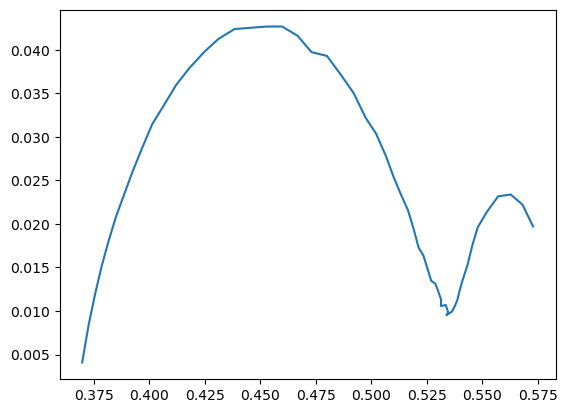

In [3]:
plt.plot(Z_exact_re, -Z_exact_im)
plt.show()

Next we create our initial guess for the DRT - here we assume a Guassian profile 

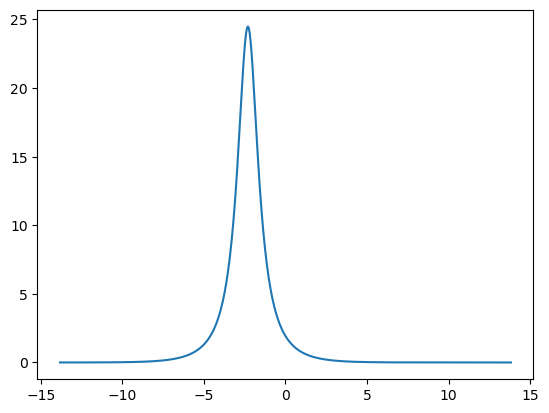

In [4]:
gamma_guess = gamma_ZARC(tau, R_ct=50, tau_0=.1, phi= .8)
plt.plot(jnp.log(tau), gamma_guess)

In [5]:
# drt = DRT(R_inf= 10, L_0=0, gamma=gamma_guess, tau=tau)

In [6]:
# simulation = Simulation(drt=drt, f_vec=f)

In [7]:
# Z_re_fake, Z_im_fake = simulation.run()

# plt.plot(Z_re, Z_im)
# plt.plot(Z_re_fake, -Z_im_fake)
# plt.show()

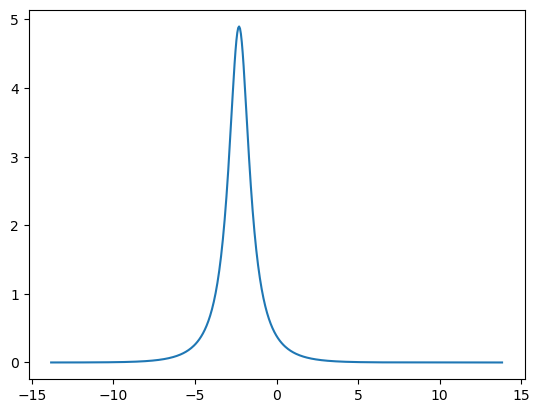

In [8]:
# Creating Fake Data
# measurement = Measurement(Z_re_fake, Z_im_fake, f)

gamma_guess2 = gamma_ZARC(tau,  R_ct=10, tau_0=.1, phi= .8)
plt.plot(jnp.log(tau), gamma_guess2)

drt_guess = DRT(R_inf=50, L_0=0, gamma=gamma_guess2, tau=tau)

In [9]:


solver_dict = {'lambda': .08, 'maxiter': 10000}
optim = Optimizer(drt=drt_guess, measurement=measurement, solver="regression", solver_dict = solver_dict)
final_sim = optim.run()

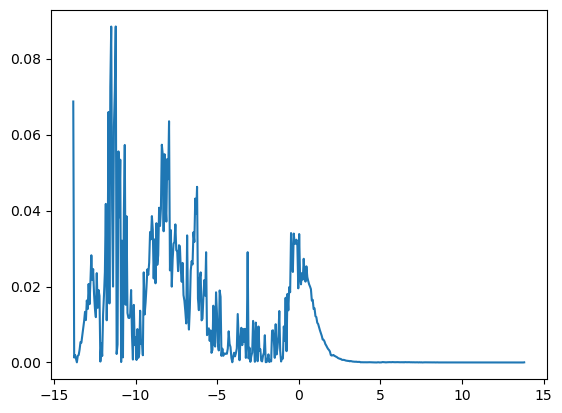

In [10]:
drt_final = DRT(final_sim.R_inf, final_sim.L_0, final_sim.drt, final_sim.tau)

# Create simulation object with optimized values
simulation_final = Simulation(drt_final, f_vec=f)

plt.plot(jnp.log(final_sim.tau), final_sim.drt)
# plt.plot(jnp.log(final_sim.tau), gamma_guess2)
plt.show()


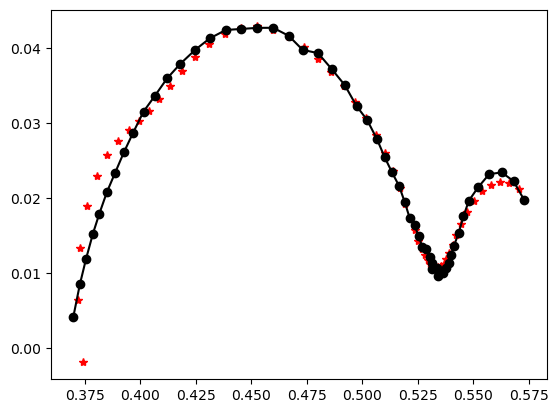

In [11]:
Z_re, Z_im = simulation_final.run()

plt.plot(Z_re, -Z_im, 'r*')
plt.plot(Z_exact_re, -Z_exact_im, '-ko')
plt.show()